# Monthly Rain Reports - Version2


In [2]:
%load_ext autoreload
%autoreload 2

import logging
from pathlib import Path
import matplotlib.pyplot as plt

import pandas as pd
import geopandas as gpd
import contextily as cx

from mergedownloader.inpeparser import INPE_SERVER, InpeParsers, InpeTypes
from mergedownloader.downloader import Downloader
# from rainreporter.reporter import Reporter

import rasterio as rio
import xarray as xr


## Create a Reporter Instance

In [3]:
from rainreporter.monthly_report import MonthlyReport
from mergedownloader.file_downloader import FileDownloader, ConnectionType, DownloadMode
from rainreporter.mapper import Mapper

In [4]:
# Create a Downloader instance
fd = FileDownloader(
    server=INPE_SERVER, 
    connection_type=ConnectionType.HTTP,
    download_mode=DownloadMode.NO_UPDATE
)
downloader = Downloader(
    file_downloader=fd,
    local_folder='/workspaces/reports_folder/downloads2',
    parsers=InpeParsers
)

Using wget through HTTP on: ftp.cptec.inpe.br


In [5]:
from rainreporter.utils import open_json_file
reporter_config = open_json_file('../reporter.json5')

In [6]:
mapper = Mapper(
    config=reporter_config['shape_style'],
    shapes=reporter_config['context_shapes']
)

../data/cities/cidades.shp
../data/states/BR_UF_2022.shp
../data/rivers/main_rivers.shp
../data/dams


In [7]:
monthly = MonthlyReport(
    downloader=downloader,
    mapper=mapper,
    shp_file='/workspaces/reports_folder/bases/bacias_interesse/bacia_Parana.shp',
    name='Parana',
    month_lbk=24,
    wet_month=10
)

## Generate Anomaly Map

In [10]:
gdf = gpd.read_parquet('/workspaces/bases/geoparquets/brasil.parquet')

(-39.79464069534737, 11.315303778347497)

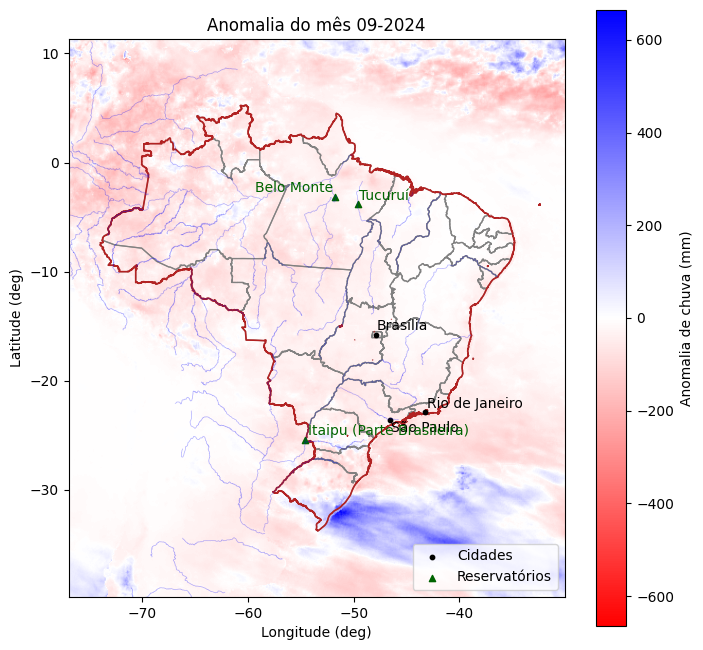

In [19]:
fig, ax = plt.subplots(figsize=(8, 8))
monthly.plot_anomaly_map(
    date='2024-09',
    shp=gdf,
    plt_ax=ax
)

ax.set_xlim(-76.97401717834738, -30.06407270465251)
ax.set_ylim(-39.79464069534737, 11.315303778347497)

In [14]:
ax.axis()

(-76.97401717834738,
 -25.86407270465251,
 -39.79464069534737,
 11.315303778347497)

## Export data for PowerBI

In [12]:
monthly.export_report_data(
    date='2024-09',
    file=Path('/workspaces/reports_folder/tmp/rcar_monthly_rain.parquet'),
    assets_folder=Path('/workspaces/reports_folder/tmp/'),
)

In [13]:
df = pd.read_parquet(
    '/workspaces/reports_folder/tmp/rcar_monthly_rain.parquet', 
)
df

time       pacum         lta  last_date  \
month   basin                                                                   
2022-10 Parana         2022-10-01 12:00:00  145.061676  136.182896        NaT   
2022-11 Paraiba do Sul 2022-11-01 12:00:00  178.653336  189.197816        NaT   
        Parana         2022-11-01 12:00:00   88.921516  155.442405        NaT   
        São Francisco  2022-11-01 12:00:00  211.573914  132.075899        NaT   
2022-12 Paraiba do Sul 2022-12-01 12:00:00  215.332062  228.355395        NaT   
...                                    ...         ...         ...        ...   
2024-09 Paraiba do Sul 2024-09-01 12:00:00   10.796875   55.052486        NaT   
        Parana         2024-09-01 12:00:00   36.121399   75.836429        NaT   
        São Francisco  2024-09-01 12:00:00    1.606968   15.221847        NaT   
2024-10 Paraiba do Sul 2024-10-01 12:00:00    3.765752  106.831063 2024-10-09   
        São Francisco  2024-10-01 12:00:00    0.746492   52.759258 2024-10-09   

                                       anomaly_map  
month   basin                                       
2022-10 Parana                                None  
2022-11 Paraiba do Sul                        None  
        Parana                                None  
        São Francisco                         None  
2022-12 Paraiba do Sul                        None  
...                                            ...  
2024-09 Paraiba do Sul                        None  
        Parana                  Parana-2024-09.png  
        São Francisco                         None  
2024-10 Paraiba do Sul  Paraiba_do_Sul-2024-10.png  
        São Francisco    Sao_Francisco-2024-10.png  

[72 rows x 5 columns]